**Table of Content:**

**1. Convolution Neural Network **
    * Defination
    * Math
    * Activation Functions
    * Steps involved in building a Convolution Neural Network
**2. Implementation**
    * Importing Neccesary Libraries Required
    * Importing and Pre- Processing Dataset
    * Building the Deep Learning Model
    * Running the Model
    * Evaluation of the Model
    * Visualization of the accuracy and error

What is Convolution Network Network?

CNN is a type of Neural Network which is widely used in Image Processing/ Detection/ Classification Task. They are also used in Speech Recognition and NLP task but we will focus on task related to computer vision. They are becoming very popular as they are able to extract features from the images which help them differentiate it with respect the other images. CNN are Neural networks with learnable weights and bias which they learn on their own in order to minimize the cost function. Images might be single channel (Black and White) or they can be 3 channel (Coloured Image RGB).

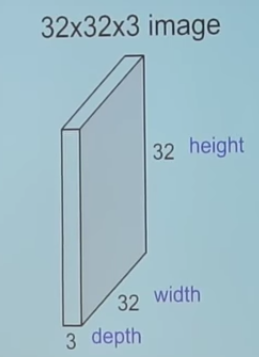

# Image of convolution

Working of Convolution Neural Networks

Suppose we have a RGB image of size 32x32. Then the dimensions of the image are 32x32x3. Now we initilize a kernel mostly a square sized kernel with odd value (3x3x3 or 5x5x3 or 7x7x3). We will take our kernel to be 5x5x3. The values in the image of 32x32x3 are pixels of that image and values in the kernel are initialized randomly which will be learned by the network in order to minimize the cost function. 

We take this kernel and hover over the image pixels and find out dot product of kernel with each chunk of the image. The value obtained after the dot product replaces the values of the image on which kernel was applied and is now the center most pixel of that chunk of the image.

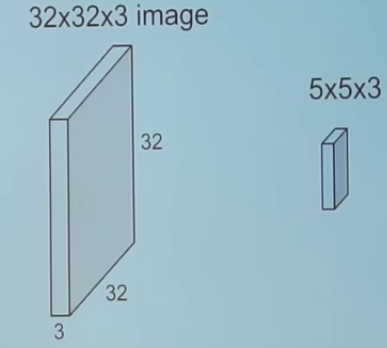

After the kernel is applied on the first chunk of the image when move the kernel to the right of first pixel column in order to calculate the pixel values for the next set of pixels. The number of columns by which the kernel moves right for the next dot profuc calculation is called stride. We can change the value of stride as its a hyerparameter. Also we can notice that the kernel will reduce the size of the resulting image as when the kernel will move from top left to bottom right calculating the dot product as the right most 2 columns and left most 2 columns will never be taken into consideration so we can see that now the initial image of 32x32x3 has now become 28x28x3. The output image of dot product of all the images in called as feature map. Each neuron calculated one feature map. Number of feature maps calculated in every layer is equal to number of neurons in that layer.

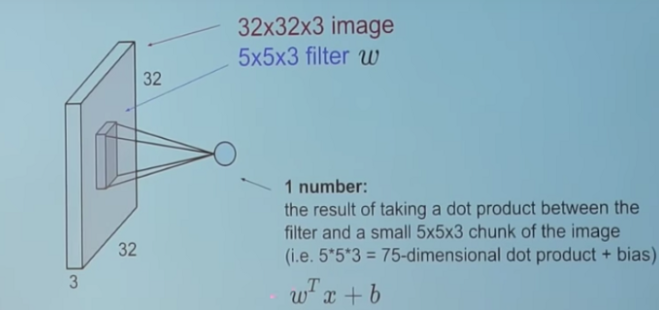

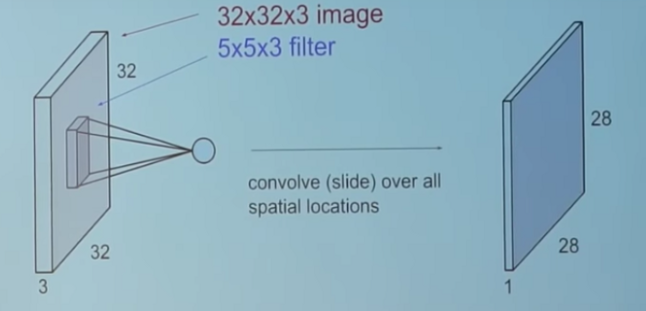

The initial layers are responsible for extracting basic features of the image such as curves, edges, lines where as when we go deeper into the network (Add more layers) then the deeper layers are responsible to learn more complex features of the images.

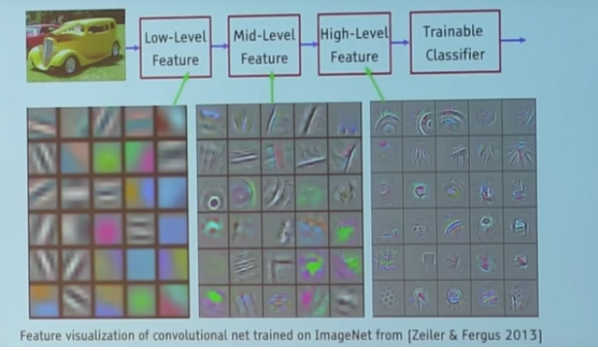

**Different Types of Layers in Neural Networks**
1) Convolution Layer - Convolution layer are the layers responsible for extracting and learning features from the images.

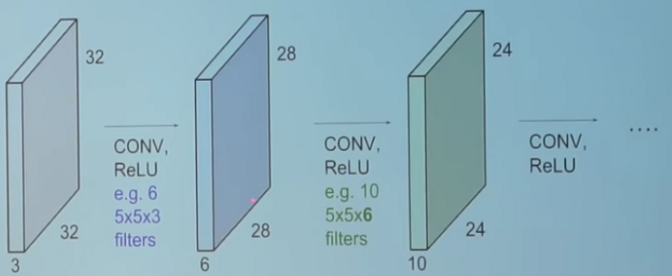

2) Maxpooling layers - This layer is responsible for taking out only the important pixel value from the chunk of image which lies under the kernel. Let me explain you this in more detail. In this step again we have to initalize a kernel suppose we say a kernel size of (2,2). This kernel again hovers sequentially over the image. It then picks up the maximum value from the 2x2 matrix of the image pixels lying under the kernel. This will help the model to focus only on important value of the image and also this will highly reduce the dimensions of the feature map. This also helps in speeding up the computation of the network. Pooling is a useful step as it helps the network to focus only the important pixel of the images.

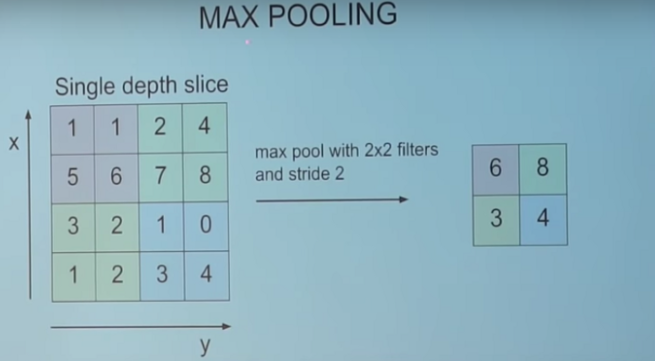

Activation Functions
1) Linear activation Function - Equation is f(x) = x. Its output is similar to the input. Hence they are not preferred in Deep Learning.

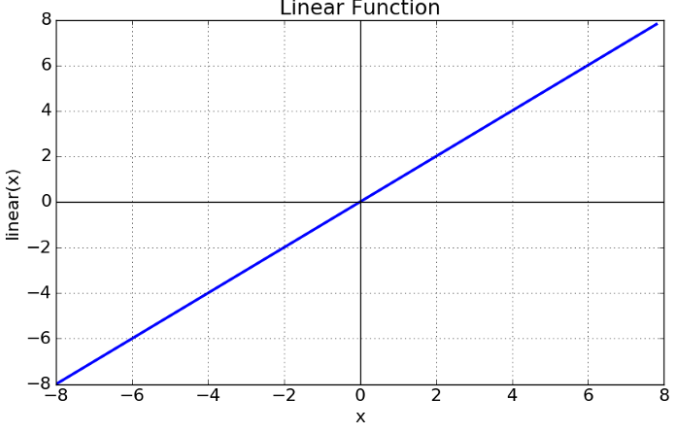

2) Sigmoid Activation Function - 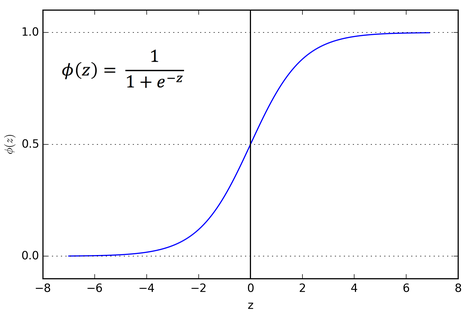

The reason why we use Sigmoid activation function is that is always returns a value between 0 and 1 giving the probability of an observation belonging to a particular class. This is mainly used in the final layer which gives us the final prediction of the particular instance. Also this can be ony used when we are performing a binary classification.

3) Softmax Function - This is similar to Sigmoid function the only difference is that it is used when we have categorical classification that is more than 2 classes. This function also returns the probability of the image belonging the a particular task. Then we pick the maximum probability and assign it to that class.

4) TanH (Hyperbolic Tangent function) -

This activation function is similar to Sigmoid function. The only difference is that the sigmoid function outputs the value from range 0 to 1 where as TanH function outputs the values from range -1 to 1. 

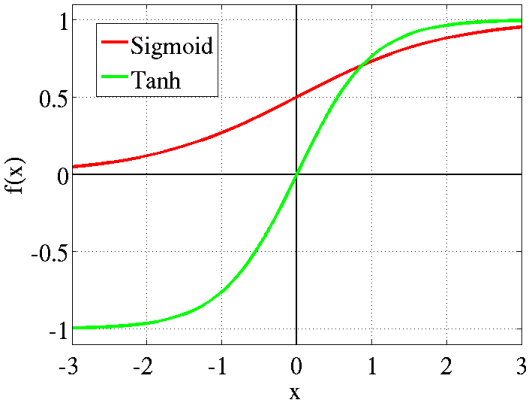

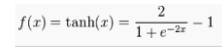

There are other activation functions available as well but these are the most widely used.

Typical Convolution Neural Network Architecture.

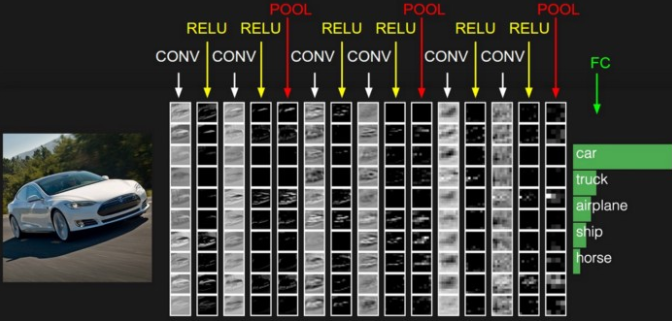

**Loading required libraries**

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,Flatten,MaxPooling2D,BatchNormalization,Dropout
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
%matplotlib inline

Using TensorFlow backend.


**Reading the training dataset from CSV file and displaying it.**

In [2]:
df = pd.read_csv('../input/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* **Dividing the Dataset into X and Y**                                                 
Converting y label to categorical variable that is doing one hot encoding of the labels.
* 0 = [1,0,0,0,0,0,0,0,0,0]
* 1 = [0,1,0,0,0,0,0,0,0,0]
* 2 = [0,0,1,0,0,0,0,0,0,0]
and so on till 9[](http://)

In [4]:
x = df.drop('label',1)
y = df['label']
y = to_categorical(y)

**Normalizing the data so that processing becomes fast**

In [5]:
x = x/255.0

**As we can see that the each row of the csv represents one image i.e digit in this case. We now want to reshape the data in order to make the one dimensional array of pixels that is one row into 28x28 square image.
Reshaping the values of X into 42000,28,28,1. 42000 are the number of images there in the training data. 28x28 is the image size and 1 represents the number of channels in the image. ! represent that it is a gray scale image.
Had it been coloured image we would have mentioned 3 instead of 1.**

In [6]:
x = x.values.reshape(42000,28,28,1)

In [7]:
x.shape

(42000, 28, 28, 1)

**Displaying the image of the data.**

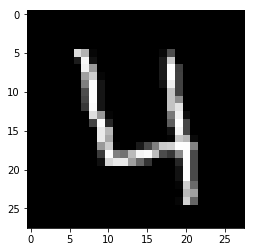

In [8]:
plt.imshow(x[3].reshape(28,28),cmap = 'gray')

Defining the model now
1. First Layer is a convolution layer with 32 neurons and having a kernel size of (5,5). The padding is kept same which means we are not reducing the dimensions of the image after convolution. Convolution layer will extract features from the images and help it generalize in order to train the neural netwrok and find optimal values for the kernels. Padding will add an additional layer of zeros on all the sides of the image. This convolution layer is followed by the maxpooling layer. We add maxpooling layer for 2 reasons. First is to reduce the dimensions of the image so that processing becomes faster. Secondly to remove the spartiality from the image which is obtained after the convolution layer.

2. Second layer is same as first layer
3. Third and forth layer have Convolution layer with 64 neurons each and kernel size of (3,3) and activation function of relu with padding parameter as same followed by maxpooling layer.
4. Then we flatten the output from convolution layer which is fed to the dense connected layers having 256 neurons and relu activation function followed by a dropout layer of 20% deactivation of neurons.
5. Finally we have the output layer having 10 neurons because those are the number of classes in our y label which uses a softmax function which gives the probability of a particular input belonging to the particular y class.

In [9]:
model1 = Sequential()
model1.add(Convolution2D(32,(5,5),activation='relu',input_shape = (28,28,1),padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32,(5,5),activation='relu',padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64,(3,3),activation='relu',padding = 'same'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64,(3,3),activation = 'relu',padding = 'same'))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10,activation = 'softmax'))

In [10]:
model1.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [11]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
__________

In [12]:
history = model1.fit(x,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 11s 302us/step - loss: 0.1911 - acc: 0.9383 - val_loss: 0.0732 - val_acc: 0.9767
Epoch 2/10
37800/37800 [==============================] - 8s 209us/step - loss: 0.0570 - acc: 0.9826 - val_loss: 0.0437 - val_acc: 0.9862
Epoch 3/10
37800/37800 [==============================] - 8s 209us/step - loss: 0.0432 - acc: 0.9866 - val_loss: 0.0388 - val_acc: 0.9876
Epoch 4/10
37800/37800 [==============================] - 8s 212us/step - loss: 0.0326 - acc: 0.9901 - val_loss: 0.0509 - val_acc: 0.9848
Epoch 5/10
37800/37800 [==============================] - 8s 209us/step - loss: 0.0274 - acc: 0.9915 - val_loss: 0.0371 - val_acc: 0.9895
Epoch 6/10
37800/37800 [==============================] - 8s 209us/step - loss: 0.0236 - acc: 0.9926 - val_loss: 0.0294 - val_acc: 0.9910
Epoch 7/10
37800/37800 [==============================] - 8s 208us/step - loss: 0.0191 - acc: 0.9944 - val_loss: 0.0417 - 

In [13]:
values = history.history
validation_acc = values['val_acc']
training_acc = values['acc']
validation_loss = values['val_loss']
training_loss = values['loss']
epochs = range(10)

Here we plot as graph between Training and Validation Accuracy

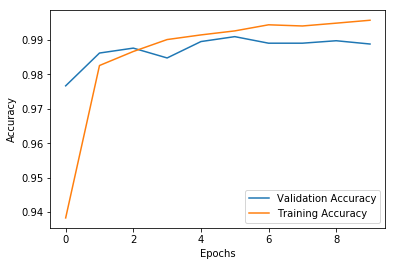

In [14]:
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Here we plot as graph between Training and Validation Loss

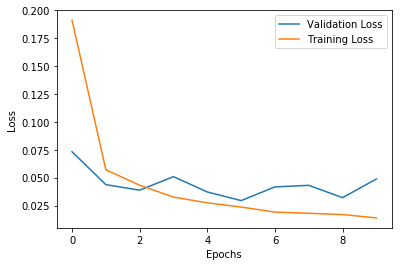

In [15]:
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Second Model

In [16]:
model2 = Sequential()
model2.add(Convolution2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model2.add(Convolution2D(32,(3,3),activation='relu'))
model2.add(Convolution2D(64,(3,3),activation='relu'))
model2.add(Convolution2D(64,(3,3),activation = 'relu'))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation = 'softmax'))

In [17]:
model2.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [18]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6553856   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [19]:
history = model2.fit(x,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 12s 311us/step - loss: 0.1354 - acc: 0.9588 - val_loss: 0.0492 - val_acc: 0.9831
Epoch 2/10
37800/37800 [==============================] - 11s 282us/step - loss: 0.0467 - acc: 0.9849 - val_loss: 0.0365 - val_acc: 0.9876
Epoch 3/10
37800/37800 [==============================] - 11s 280us/step - loss: 0.0304 - acc: 0.9907 - val_loss: 0.0394 - val_acc: 0.9874
Epoch 4/10
37800/37800 [==============================] - 11s 281us/step - loss: 0.0217 - acc: 0.9925 - val_loss: 0.0406 - val_acc: 0.9893
Epoch 5/10
37800/37800 [==============================] - 11s 282us/step - loss: 0.0171 - acc: 0.9943 - val_loss: 0.0374 - val_acc: 0.9881
Epoch 6/10
37800/37800 [==============================] - 11s 281us/step - loss: 0.0150 - acc: 0.9955 - val_loss: 0.0352 - val_acc: 0.9917
Epoch 7/10
37800/37800 [==============================] - 11s 282us/step - loss: 0.0102 - acc: 0.9964 - val_loss: 0.0

In [20]:
values = history.history
validation_acc = values['val_acc']
training_acc = values['acc']
validation_loss = values['val_loss']
training_loss = values['loss']
epochs = range(10)

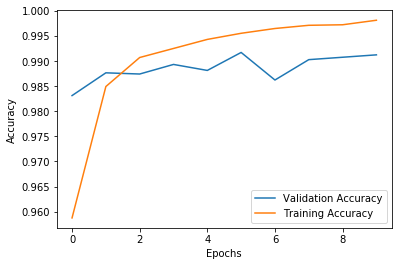

In [21]:
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

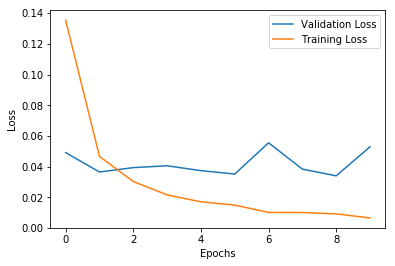

In [22]:
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Third Model

In [23]:
model3 = Sequential()
model3.add(Convolution2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model3.add(MaxPooling2D(2,2))
model3.add(Convolution2D(64,(3,3),activation='relu'))
model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10,activation = 'softmax'))

In [24]:
model3.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [25]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

In [26]:
history = model3.fit(x,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 8s 201us/step - loss: 0.1605 - acc: 0.9499 - val_loss: 0.0502 - val_acc: 0.9826
Epoch 2/10
37800/37800 [==============================] - 7s 184us/step - loss: 0.0523 - acc: 0.9840 - val_loss: 0.0473 - val_acc: 0.9855
Epoch 3/10
37800/37800 [==============================] - 7s 186us/step - loss: 0.0358 - acc: 0.9886 - val_loss: 0.0519 - val_acc: 0.9845
Epoch 4/10
37800/37800 [==============================] - 7s 185us/step - loss: 0.0272 - acc: 0.9912 - val_loss: 0.0385 - val_acc: 0.9890
Epoch 5/10
37800/37800 [==============================] - 7s 183us/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0392 - val_acc: 0.9890
Epoch 6/10
37800/37800 [==============================] - 7s 184us/step - loss: 0.0166 - acc: 0.9945 - val_loss: 0.0389 - val_acc: 0.9895
Epoch 7/10
37800/37800 [==============================] - 7s 184us/step - loss: 0.0143 - acc: 0.9949 - val_loss: 0.0445 - v

In [27]:
values = history.history
validation_acc = values['val_acc']
training_acc = values['acc']
validation_loss = values['val_loss']
training_loss = values['loss']
epochs = range(10)

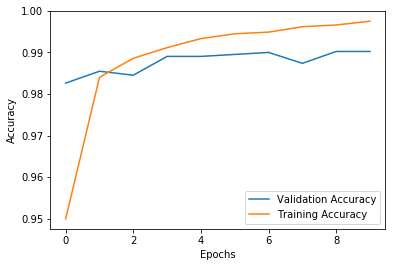

In [28]:
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

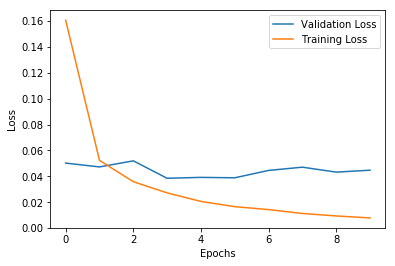

In [29]:
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Fourth Model

In [30]:
model4 = Sequential()
model4.add(Convolution2D(32,(5,5),activation='tanh',input_shape = (28,28,1),padding='same'))
model4.add(MaxPooling2D(2,2))
model4.add(Convolution2D(32,(5,5),activation='tanh',padding='same'))
model4.add(MaxPooling2D(2,2))
model4.add(Convolution2D(64,(3,3),activation='tanh',padding = 'same'))
model4.add(MaxPooling2D(2,2))
model4.add(Convolution2D(64,(3,3),activation = 'tanh',padding = 'same'))
model4.add(Flatten())
model4.add(Dense(256,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10,activation = 'softmax'))

In [31]:
model4.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [32]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
__________

In [33]:
history = model4.fit(x,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 9s 229us/step - loss: 0.1773 - acc: 0.9431 - val_loss: 0.0766 - val_acc: 0.9767
Epoch 2/10
37800/37800 [==============================] - 8s 211us/step - loss: 0.0702 - acc: 0.9787 - val_loss: 0.0509 - val_acc: 0.9819
Epoch 3/10
37800/37800 [==============================] - 8s 208us/step - loss: 0.0541 - acc: 0.9836 - val_loss: 0.0687 - val_acc: 0.9786
Epoch 4/10
37800/37800 [==============================] - 8s 208us/step - loss: 0.0467 - acc: 0.9864 - val_loss: 0.0614 - val_acc: 0.9843
Epoch 5/10
37800/37800 [==============================] - 8s 207us/step - loss: 0.0408 - acc: 0.9870 - val_loss: 0.0401 - val_acc: 0.9879
Epoch 6/10
37800/37800 [==============================] - 8s 221us/step - loss: 0.0323 - acc: 0.9905 - val_loss: 0.0668 - val_acc: 0.9812
Epoch 7/10
37800/37800 [==============================] - 8s 211us/step - loss: 0.0362 - acc: 0.9900 - val_loss: 0.0480 - v

In [34]:
values = history.history
validation_acc = values['val_acc']
training_acc = values['acc']
validation_loss = values['val_loss']
training_loss = values['loss']
epochs = range(10)

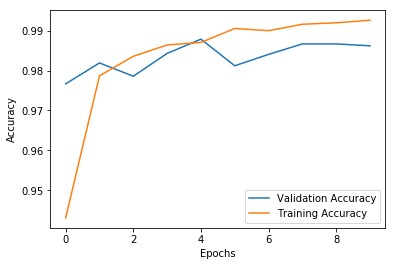

In [35]:
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

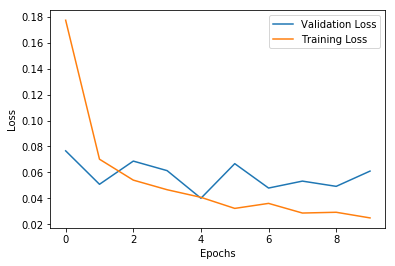

In [36]:
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
plot_model(model1,to_file='model1.png',show_layer_names=True,show_shapes=True)
plot_model(model2,to_file='model2.png',show_layer_names=True,show_shapes=True)
plot_model(model3,to_file='model3.png',show_layer_names=True,show_shapes=True)
plot_model(model4,to_file='model4.png',show_layer_names=True,show_shapes=True)

In [38]:
test = pd.read_csv('../input/test.csv')

In [39]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
sub = pd.read_csv('../input/sample_submission.csv')

In [41]:
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [42]:
test = test/255.0

In [43]:
test.shape

(28000, 784)

In [44]:
test = test.values.reshape(28000,28,28,1)

In [45]:
predict_model1 = model1.predict_classes(test)

In [46]:
predict_model2 = model2.predict_classes(test)

In [47]:
predict_model3 = model3.predict_classes(test)

In [48]:
predict_model4 = model4.predict_classes(test)

In [49]:
final_prediction = 0.25*predict_model1+0.25*predict_model2+0.25*predict_model3+0.25*predict_model4

In [50]:
final_prediction = np.round(final_prediction)


In [51]:
answer = []
for i in range(len(final_prediction)):
    answer.append(int(final_prediction[i]))

In [52]:
predict = pd.Series(answer,name="Label")

In [53]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)

In [54]:
submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [55]:
predict = pd.Series(predict_model1,name="Label")
submission_1 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)
submission_1.to_csv("submission1.csv",index=False)

In [56]:
predict = pd.Series(predict_model2,name="Label")
submission_2 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)
submission_2.to_csv("submission2.csv",index=False)

In [57]:
predict = pd.Series(predict_model3,name="Label")
submission_3 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)
submission_3.to_csv("submission3.csv",index=False)

In [58]:
predict = pd.Series(predict_model4,name="Label")
submission_4 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)
submission_4.to_csv("submission4.csv",index=False)

Here I have created 4 different models with different architecture in order to see which one performs better on the data. You are free to make any changes in the architecture. There is no hard and fast rule which helps you decide number of neurons or number of layers. They all are hyperparameters and different for every problem statement. A common approch is to start with number of neurons with 2^n value (8,16,32,64,128,256,512....). making your model more complex can lead to overfitting.

Overfitting is a concept in which model starts learning from the noise present in the data making your model do very well on the training set but not at all good on the test. This means the model is not able to generalize well on the unseen data. This problem is very common in Deep Neural Networks as with increase in complexity of the model, it starts to overfit. 
Solution - 
Adding More Data, 
Performing Data Augmentation, 
Reducing the complexity of the model (Reducing number of neurons or Layers), 
Adding more regularization (Dropout Layers). They can be added after maxpooling as well. 

This can be observed when your training accuracy is lot higher than validation accuracy

Opposite of Overfitting is Underfitting - In this the model is not able to capture all the underlining features of the data making it under perform on the training data. This is be imporved by training the model for longer time or increasing the complexity of the model. Testing accuracy is much higher than training accuracy.

Our overall goal should be to increase both training and testing accuracy keeping them as close as possible to each other.